<a href="https://colab.research.google.com/github/conste11ations/ml3253-2021/blob/main/Week_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Assignment 3

## In this weeek you are building a classification model using credit card client dataset. Once you run below code, you can submit your response on the Quercus platform.

In [2]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Classification

<pre>
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 

X6 : the repayment status in September, 2005;
X7 : the repayment status in August, 2005; . . .;X11 : the repayment status in April, 2005. 

The measurement scale for the repayment status is:

-2: No consumption; 
-1: Paid in full;
 0: The use of revolving credit; 
 1: payment delay for one month; 
 2: payment delay for two months; . . .; 8 = payment delay for eight months; 
 9: payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). 
X12 : amount of bill statement in September, 2005; 
X13 : amount of bill statement in August, 2005; . . .; X17 : amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). 
X18 : amount paid in September, 2005; 
X19 : amount paid in August, 2005; . . .;X23 : amount paid in April, 2005.

Y: client's behavior; Y=0 then not default, Y=1 then default 
</pre>

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline (Pipeline is part of learning during assignment. There are tons of freely available contents you can use, including this [video](https://www.youtube.com/watch?v=Om_TFrFGotQ) and [this](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) one from SKLearn )
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Implement hyper parameter tuning for your models. If you need to read more about hyperparameter tuning, please read [this](https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624) blog. You also had the same think in week 1 notebook (you can refer to the week 1 notebook to find out the code in action).
- Use 2 classifiers ( we will discuss random forest later in the course).
    - Random Forest (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
        - use hyperparameter tuning and try to tun only n_estimators with these values {3, 4, 6, 7, 10, 20, 50, 100} 
        
    - KNN Classfier (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
        - use hyperparameter tuning and try to tun only  n_neighbors with values {3, 4, 5, 7, 10, 20, 50} 
    - Which one performs better in the cross validation?
    

- Use Cross-validation with 4-folds and compare results.

Notes:
  - Make your code modular, the second part of the assignmet you will have to repeat. 
  - Provide inline comment and text for your code  readability 

In [3]:
### Your code here

## Feel free to use multiple cells

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", skiprows= 1, header = 0)

In [4]:
#df.loc[df.index[3330],"BILL_AMT6"]
# why not
df.loc[3330, "BILL_AMT6"]
### Your code here

df_explore = df.copy()
df = df.rename(columns={"default payment next month": "default"})
df_explore = df_explore.rename(columns={"default payment next month": "default"})


In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

In [11]:
df.shape

(30000, 25)

In [ ]:
df.dtypes

In [16]:
pd.options.display.max_columns = None
df_explore.sample(10, random_state=123)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
25665,25666,40000,2,2,2,26,-1,0,0,0,-1,0,28991,24391,13600,0,44024,18697,1300,1000,0,22373,680,10000,0
16464,16465,80000,2,3,1,59,0,0,0,0,0,0,75662,70073,53169,50875,50372,49470,3212,2106,2000,1603,1903,2006,0
22386,22387,170000,2,1,2,30,2,2,2,2,2,2,155910,158819,161487,157577,168094,170922,6800,6500,0,13000,5500,1000,1
10149,10150,200000,2,2,1,41,-2,-2,-2,-2,-2,-2,23570,735,0,0,0,0,742,0,0,0,0,0,1
8729,8730,50000,1,2,1,43,0,0,0,0,0,0,8214,8034,9044,9225,9417,9617,1140,1150,331,341,356,330,0
25295,25296,60000,2,2,2,24,0,0,0,0,0,0,50840,49592,44412,45402,35704,36524,2100,1847,1837,1139,1254,1387,0
8876,8877,50000,2,2,1,37,0,0,0,0,0,0,25234,23518,21746,18082,18461,18830,1384,1300,700,670,676,700,0
12348,12349,140000,2,3,1,46,0,0,0,0,0,0,132586,135165,125427,128016,127323,130020,4800,4500,4600,4800,4800,4500,0
3858,3859,200000,1,2,1,36,1,-2,-1,-1,-1,-1,-1,-1,296,299,278,4575,0,297,303,279,4597,0,0
19209,19210,210000,2,1,2,30,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# count nulls -> no null values
count_nulls = [ (x, df_explore[x].isnull().sum()) for x in df_explore.columns]
count_nulls

[('ID', 0),
 ('LIMIT_BAL', 0),
 ('SEX', 0),
 ('EDUCATION', 0),
 ('MARRIAGE', 0),
 ('AGE', 0),
 ('PAY_0', 0),
 ('PAY_2', 0),
 ('PAY_3', 0),
 ('PAY_4', 0),
 ('PAY_5', 0),
 ('PAY_6', 0),
 ('BILL_AMT1', 0),
 ('BILL_AMT2', 0),
 ('BILL_AMT3', 0),
 ('BILL_AMT4', 0),
 ('BILL_AMT5', 0),
 ('BILL_AMT6', 0),
 ('PAY_AMT1', 0),
 ('PAY_AMT2', 0),
 ('PAY_AMT3', 0),
 ('PAY_AMT4', 0),
 ('PAY_AMT5', 0),
 ('PAY_AMT6', 0),
 ('default', 0)]

In [18]:
# Class distribution

defaults_distr = pd.DataFrame(df_explore['default'].value_counts().astype(int))
defaults_distr

,default
0,23364
1,6636


In [19]:
print('Total number of clients: ' + str(int(defaults_distr['default'][0]+defaults_distr['default'][1]))) 
print('Defaults: ' + str(int(defaults_distr['default'][1])) + ' (' +
      str((100.0*defaults_distr['default'][1])/(defaults_distr['default'][0]+defaults_distr['default'][1])) + '%)')

Total number of clients: 30000
Defaults: 6636 (22.12%)


In [7]:
dependant_var = ["default"]

categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']

continuous_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                   'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
discrete_vars = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [21]:
pd.options.display.max_columns = None
df_explore.loc[:, dependant_var + discrete_vars + continuous_vars].describe()

,default,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,0.221200,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,0.415062,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


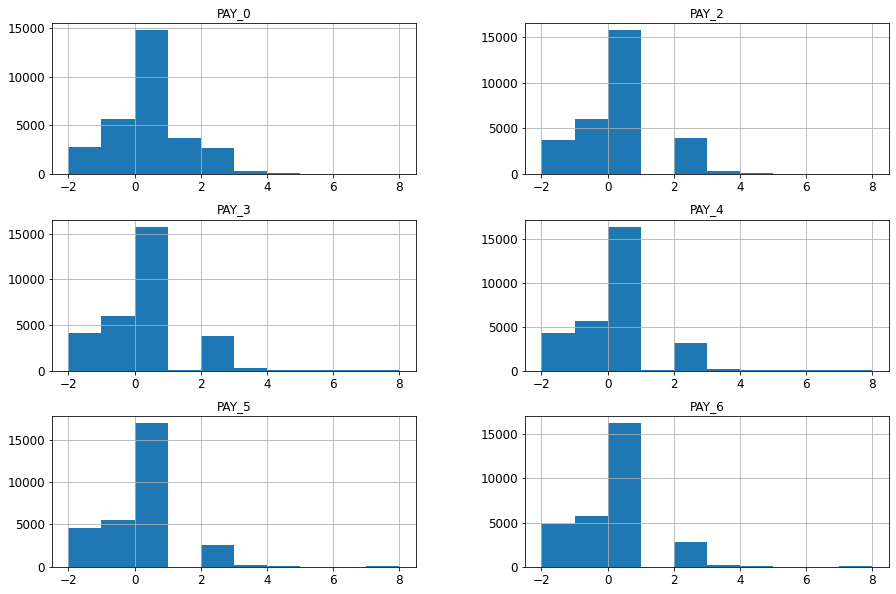

In [22]:
df_explore.loc[:, discrete_vars].hist(bins=10, figsize=(15,10))
plt.show();

In [ ]:
df_explore.loc[:, continuous_vars].hist(bins=50, figsize=(20,15))
plt.show();

In [ ]:
df_explore.loc[:, categorical_vars].hist(bins=10, figsize=(15,10))
plt.show();

In [ ]:
# more imports
import seaborn as sns
sns.pairplot(data=df_explore.loc[:, dependant_var + continuous_vars]);


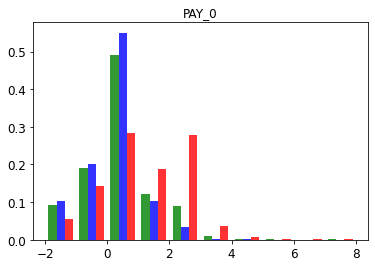

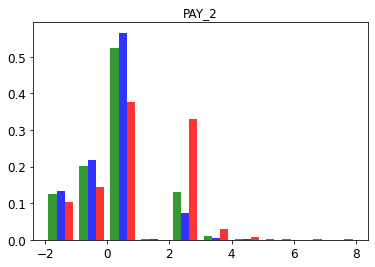

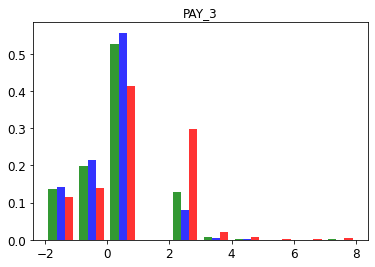

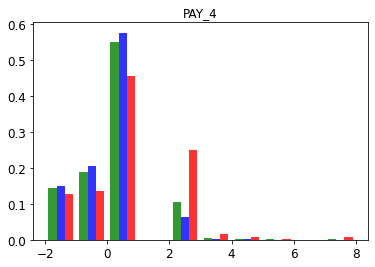

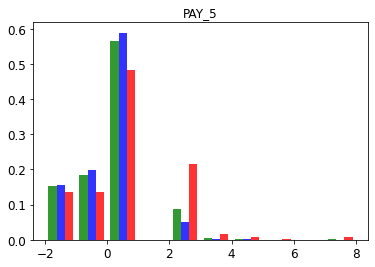

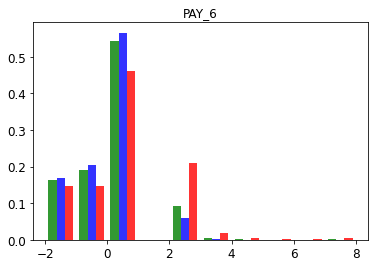

In [8]:
# Df to draw charts for clients that default, default=1
df_default = df_explore.where(df_explore['default']==1)
df_ok = df_explore.where(df_explore['default']==0)
# Plot the density - all cases (green), payed (blue) and default (red)
for i, var in enumerate(discrete_vars):
    plt.figure(i)
    plt.title(var)

    plt.hist([df_explore.loc[:, var], df_ok.loc[:, var], df_default.loc[:, var]], density=True, color=['g','b','r'], alpha=0.8);

In [ ]:
# continuous vars
for i, var in enumerate(continuous_vars):
    plt.figure(i)
    plt.title(var)

    plt.hist([df_explore.loc[:, var], df_ok.loc[:, var], df_default.loc[:, var]], density=True, color=['g','b','r'], alpha=0.8);

In [ ]:
# category variables
for i, var in enumerate(categorical_vars):
    plt.figure(i)
    plt.title(var)

    plt.hist([df_explore.loc[:, var], df_ok.loc[:, var], df_default.loc[:, var]], density=True, color=['g','b','r'], alpha=0.8);

In [9]:
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))
pd.options.display.max_columns = None

In [10]:
# Categorical - one hot encode
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

In [11]:
# Numerical - scale
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, continuous_vars + discrete_vars)]

In [12]:
%%time
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + continuous_vars  + discrete_vars])
X = ct.transform(df[categorical_vars + continuous_vars + discrete_vars])
y = df[['default']].values

CPU times: user 44.1 ms, sys: 6.04 ms, total: 50.1 ms
Wall time: 52 ms


In [27]:
df_describe = pd.DataFrame(X)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.396267,0.603733,0.000467,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700,0.001800,0.455300,0.532133,0.010767,0.159075,0.249750,0.191846,0.112893,0.112157,0.200891,0.120620,0.290851,0.006483,0.003516,0.005832,0.007771,0.011252,0.009865,0.19833,0.186623,0.183380,0.177933,0.173380,0.170890
std,0.489129,0.489129,0.021598,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197,0.042389,0.498006,0.498975,0.103204,0.131058,0.158929,0.065159,0.067546,0.038076,0.060601,0.060284,0.045766,0.018961,0.013680,0.019650,0.025227,0.035820,0.033627,0.11238,0.119719,0.119687,0.116914,0.113319,0.114999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040404,0.120690,0.149668,0.069053,0.087808,0.162330,0.082396,0.261944,0.001145,0.000495,0.000435,0.000477,0.000592,0.000223,0.10000,0.100000,0.100000,0.100000,0.100000,0.100000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.131313,0.224138,0.166324,0.086340,0.097374,0.178084,0.098600,0.274097,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.232323,0.344828,0.205887,0.126964,0.119378,0.211482,0.130415,0.298787,0.005731,0.002969,0.005028,0.006463,0.009452,0.007566,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 33) (6000, 33) (24000, 1) (6000, 1)
CPU times: user 143 ms, sys: 3.33 ms, total: 146 ms
Wall time: 154 ms


## **The model**
It will be a supervised ML problem, with dependant variable "default".
The response variable is binary (1 or 0), the type of the model will be classification.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def display_results(model, X, y):
    print("RMSE:", rmse(model.predict(X), y))
    print("Predicted 1-5:", model.predict(X_test[0:5]))
    print("Actual 1-5:", y_test[0:5, 0])

## Random Forrest Classifier

use hyperparameter tuning and try to tun only n_estimators with these values {3, 4, 6, 7, 10, 20, 50, 100}

In [ ]:
%%time
for n_est in [3]:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=123)
    rf.fit(X_train, np.ravel(y_train))
    print('----- Number of estimators:' + str(n_est) + '-------------')
    display_results(rf, X, y)

----- Number of estimators:3-------------


## Study the ROC Curve, decide threshold
Use 2 classifiers.

a. Random Forest

  - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)

b. KNN Classfier

  - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 

In [46]:
from sklearn.model_selection import GridSearchCV

In [48]:
# we create a dictionary of lists, each key is a parameter name
# and the list is the possible values it can take

param_grid = {
    'n_estimators':[4, 5, 10, 20, 50]
}

clf = RandomForestClassifier(n_estimators =  50, random_state = 123)
# we pass the model, our parameter grid, and cross-validation parameters to the class
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)
# last, we fit our data. This will take a while...
grid_search.fit(X=X, y=np.ravel(y))

NameError: ignored

In [43]:
# Trying out ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix

# roc curve and auc

# fit a model
model = final_model_rf
model.fit(X_train, np.ravel(y_train))

# predict probabilities
rf_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores

rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print(' Random forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curve
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_probs)
#print('Thresholds', thresholds)

# plot the roc curve for the model
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest: ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend(loc=4)
# show the plot
pyplot.show()

NameError: ignored

In [ ]:
max(df.loc[:,"PAY_0"])

In [ ]:
# Cross-validation with 5-folds
#Did you get different results compared to the 4-fold case?

#### Conclusions?

Explain your results and choices

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion. 

### Conclusions
